In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

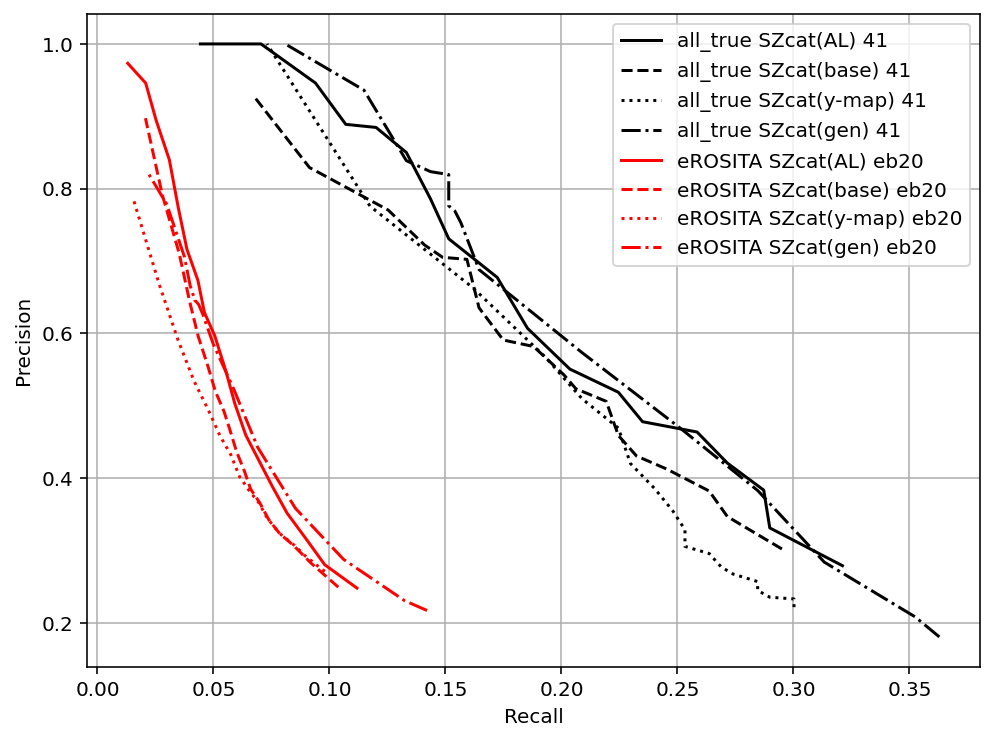

In [2]:
def show_precision_recall(ax, pixname, selected_det, selected_tr=['all_true', 'eROSITA', 'PSZ2(z)'], 
                          colors='krb', alpha=1, linestyles=['-', '--'], index_name='auto',
                         cut_df=None):
    index_auto = {
        'SZcat(base)' : 'max_pred',
        'SZcat(AL)' : 'max_pred',
        'SZcat(y-map)' : 's/n', 
        'SZcat(gen)' : 'mpp', 
        'SZcat(AL)_unique' : 'max_pred', 
        'inter' : 'max_pred',
        'inter_sn' : 's/n',
        'SZcat(AL)_unique' : 'max_pred'
    }
    if index_name == 'auto':
        index_name = index_auto[selected_det[0]]
    recalls = {name : pd.read_csv('./check/{}_recall_{}_pix{}.csv'.format(name, index_name.replace('/', ''), pixname))
                  for name in selected_det}
    if not (cut_df is None):
        for name in recalls:
            df = recalls[name]
            df = df[df['mpp'] >= cut_df]
            df.index = np.arange(len(df))
            recalls[name] = df
    for c, recall_prm, prec_prm in zip(colors, ['all_true', 'eROSITA', 'PSZ2(z)'], 
                                       ['precision', 'precision_eROSITA', 'precision_PSZ2(z)']):
        if not (recall_prm in selected_tr):
            continue
        for name_cat, st in zip(recalls, linestyles):
            df = recalls[name_cat]
            s, = ax.plot(df[recall_prm], df[prec_prm], c=c, linestyle=st, alpha=alpha)#, marker='o', markersize=2)
            s.set_label(recall_prm + ' ' + name_cat + ' ' + pixname)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')

_, ax = plt.subplots(1, 1, figsize=(8, 6))
for pixname, selected_tr, colors in zip(['41', 'eb20'], (['all_true'], ['eROSITA']), ['k', 'br']):
    dets = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['SZcat(gen)'])
    lines = (['-', '--'], [':'], ['dashdot'])
    for selected_det, linest in zip(dets, lines):
        show_precision_recall(ax, pixname, selected_tr=selected_tr, colors=colors, selected_det=selected_det, linestyles=linest)
ax.grid()
ax.legend()

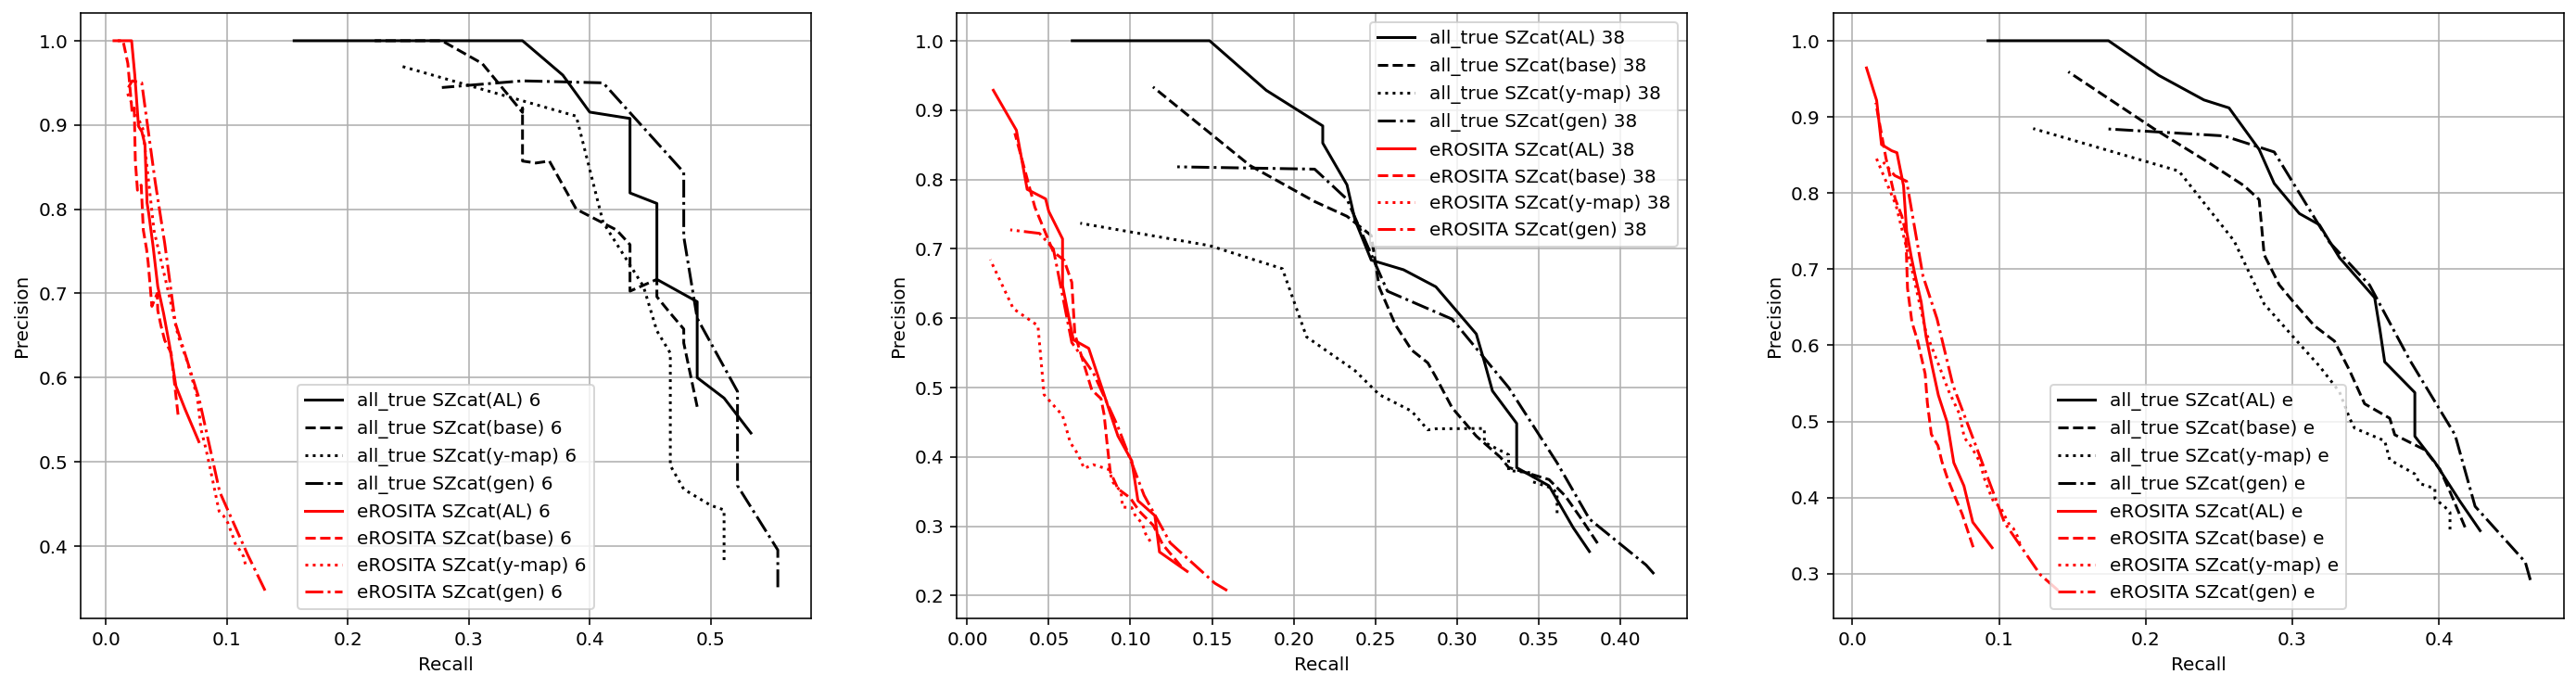

In [6]:
_, ax = plt.subplots(1, 3, figsize=(24, 6))
for i, pixname in enumerate(['6', '38', 'e']):
    for selected_tr, colors in zip((['all_true'], ['eROSITA']), ['k', 'br']):
        dets = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['SZcat(gen)'])
        lines = (['-', '--'], [':'], ['dashdot'])
        indexes = ('max_pred', 's/n', 'mpp')
        for selected_det, linest, index_name in zip(dets, lines, indexes):
            show_precision_recall(ax[i], pixname, selected_tr=selected_tr, colors=colors, selected_det=selected_det, linestyles=linest,
                                 index_name=index_name)
    ax[i].grid()
    ax[i].legend()

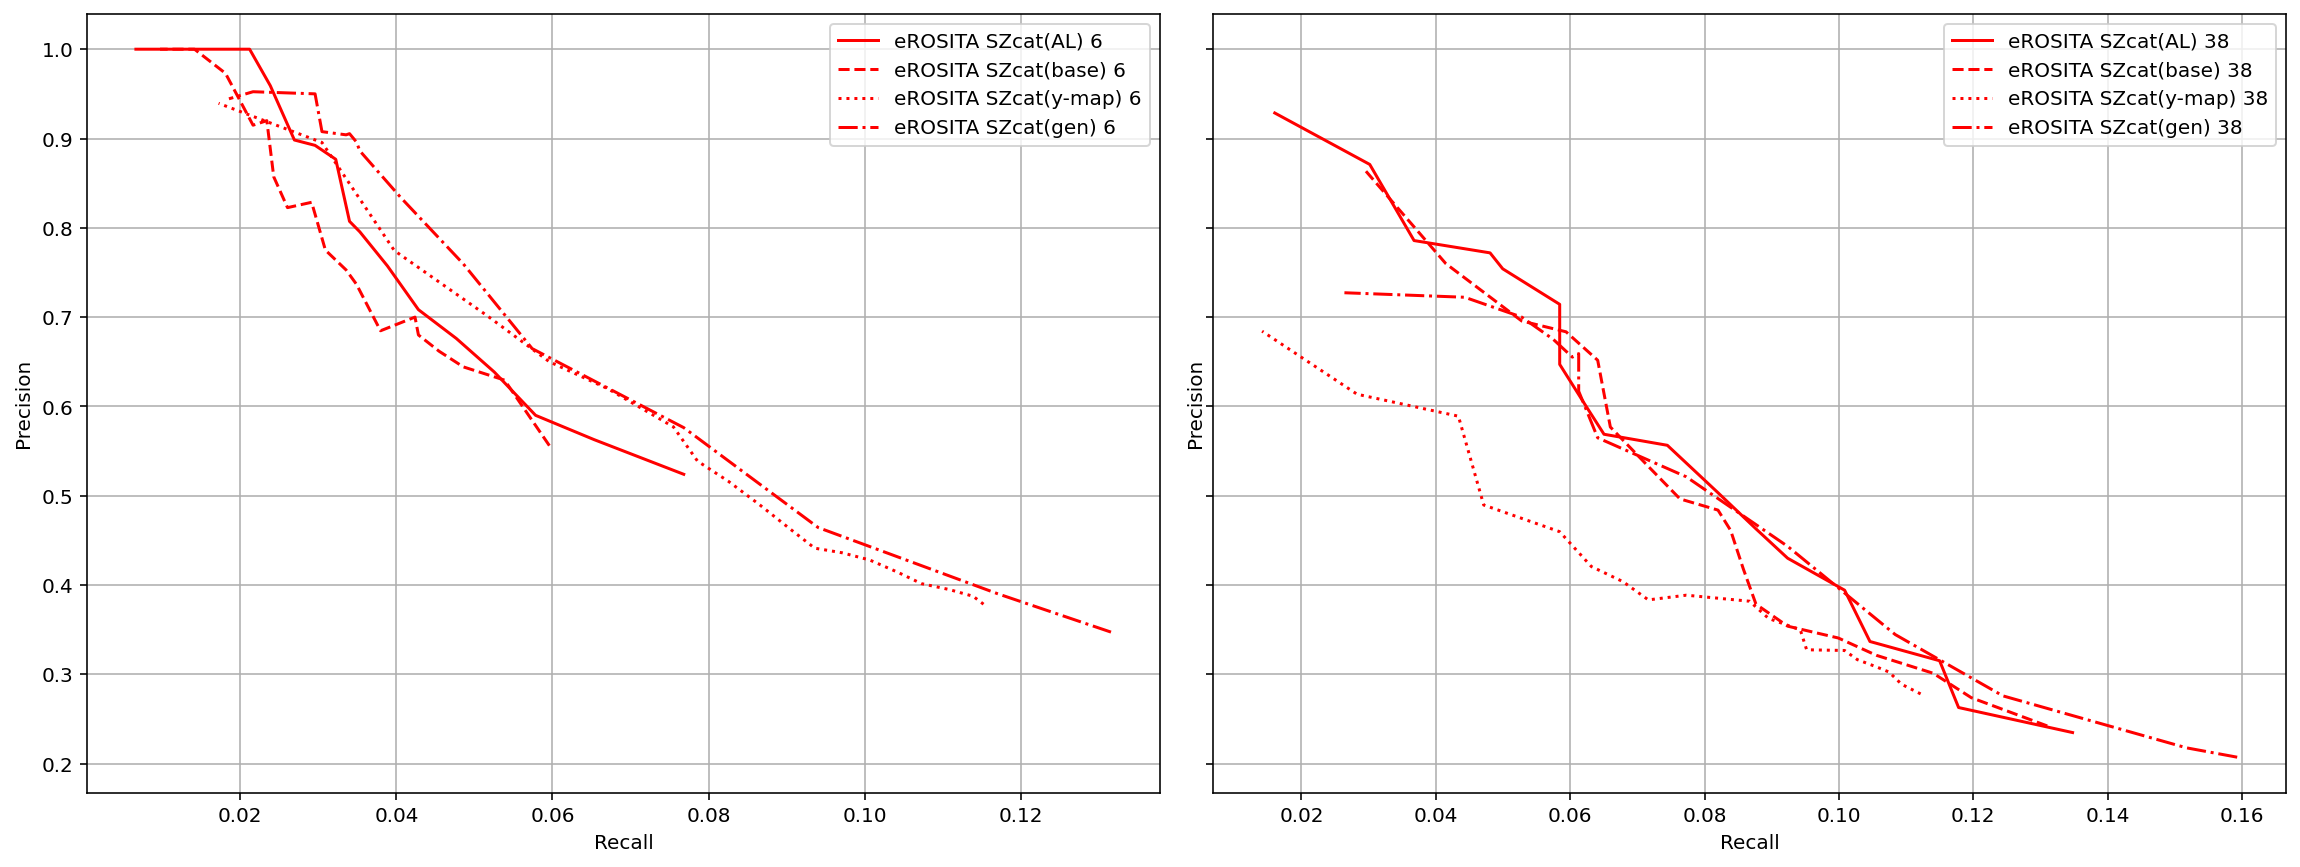

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.tight_layout()
for i, pixname in enumerate(['6', '38']):
    tr = (['eROSITA'])
    c = ['br']
    for selected_tr, colors in zip(tr, c):
        dets = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['SZcat(gen)'])
        lines = (['-', '--'], [':'], ['dashdot'])
        for selected_det, linest in zip(dets, lines):
            show_precision_recall(ax[i], pixname, selected_tr=selected_tr, colors=colors, selected_det=selected_det, linestyles=linest)
    ax[i].grid()
    ax[i].legend()

In [4]:
gen41 = pd.read_csv('./check/SZcat(gen)_recall_mpp_pix41.csv')
geneb20 = pd.read_csv('./check/SZcat(gen)_recall_mpp_pixeb20.csv')
al41 = pd.read_csv('./check/SZcat(AL)_recall_max_pred_pix41.csv')
aleb20 = pd.read_csv('./check/SZcat(AL)_recall_max_pred_pixeb20.csv')

In [6]:
geneb20

,mpp,PSZ2,MCXC,ACT,eROSITA,precision_eROSITA,found_eROSITA,PSZ2(z),precision_PSZ2(z),found_PSZ2(z),all_true,found,precision,all
0,0.00,0.979769,0.472222,0.301697,0.142090,0.217200,2619,0.994129,0.042047,507,0.386568,2823,0.234118,12058
1,0.10,0.979769,0.472222,0.301697,0.142090,0.217200,2619,0.994129,0.042047,507,0.386568,2823,0.234118,12058
2,0.20,0.979769,0.472222,0.301697,0.142090,0.217200,2619,0.994129,0.042047,507,0.386568,2823,0.234118,12058
3,0.30,0.978324,0.460000,0.289126,0.132430,0.230711,2431,0.994129,0.048116,507,0.375244,2626,0.249217,10537
4,0.40,0.971098,0.433333,0.255185,0.106062,0.287931,1930,0.994129,0.075638,507,0.346740,2099,0.313143,6703
5,0.50,0.943642,0.410000,0.223759,0.085362,0.358310,1535,0.984344,0.117180,502,0.318626,1674,0.390756,4284
6,0.60,0.916185,0.383333,0.188561,0.069049,0.442831,1220,0.974560,0.180399,497,0.286607,1327,0.481670,2755
7,0.70,0.884393,0.364444,0.169076,0.058896,0.522025,1031,0.954990,0.246582,487,0.266302,1124,0.569114,1975
8,0.80,0.845376,0.342222,0.150849,0.049926,0.585415,867,0.925636,0.318704,472,0.244045,947,0.639433,1481
9,0.88,0.776012,0.317778,0.125707,0.040020,0.665373,686,0.872798,0.431620,445,0.213588,741,0.718720,1031


In [7]:
aleb20

,max_pred,PSZ2,MCXC,ACT,eROSITA,precision_eROSITA,found_eROSITA,PSZ2(z),precision_PSZ2(z),found_PSZ2(z),all_true,found,precision,all
0,0.10,0.959538,0.421111,0.274041,0.111878,0.248093,2049,0.988258,0.061024,504,0.353768,2217,0.268434,8259
1,0.15,0.953757,0.408889,0.255185,0.097979,0.280442,1778,0.986301,0.079338,503,0.339321,1933,0.304890,6340
2,0.20,0.942197,0.402222,0.238215,0.089502,0.318057,1624,0.982387,0.098120,501,0.326435,1763,0.345280,5106
3,0.25,0.930636,0.396667,0.226901,0.081764,0.351635,1473,0.976517,0.118883,498,0.316673,1603,0.382669,4189
4,0.30,0.910405,0.384444,0.213702,0.075456,0.388201,1349,0.966732,0.141871,493,0.303397,1466,0.421871,3475
5,0.35,0.901734,0.377778,0.203017,0.069246,0.426639,1230,0.958904,0.169615,489,0.293635,1342,0.465487,2883
6,0.40,0.888728,0.366667,0.189818,0.063972,0.459295,1134,0.951076,0.196436,485,0.280750,1240,0.502228,2469
7,0.45,0.877168,0.356667,0.177876,0.059192,0.503382,1042,0.947162,0.233333,483,0.269426,1135,0.548309,2070
8,0.50,0.864162,0.348889,0.169705,0.055397,0.547659,971,0.937378,0.269600,478,0.260445,1056,0.595601,1773
9,0.55,0.842486,0.338889,0.157762,0.050567,0.596904,887,0.923679,0.316958,471,0.247950,964,0.648721,1486
